# Pixelated Metrics - Logins over time

### Instructions to run

1- Install dependencies

    $ pip install jupyter matplotlib numpy


2- Run jupyter notebook and open the `.ipynb` file

    $ jupyter notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.style.use('ggplot')

In [2]:
def get_run(users, emails, run_number):
    filename = '{}users-{}emails-{}.txt'.format(users, emails, run_number)
    run = {}
    with open(filename) as f:
        for line in f:
            key, value = line.split()
            value = float(value)
            run.setdefault(key, []).append(value)
    return run

def get_median_run(users):
    login_metric = 'login-leap-session'
    aggregate_run = []
    for run_number in range(3, 10):
        single_run = get_run(users, 0, run_number)
        aggregate_run.append(single_run)

    sorted_aggregate_run = sorted(aggregate_run, key=lambda run: np.median(run[login_metric]))
    
    median_run = sorted_aggregate_run[3]
    return median_run

In [3]:
def subplot_logins(users):
    plt.figure()
    
    fig, nested_ax = plt.subplots(3, 3, sharex=True)
    fig.suptitle('{} users'.format(users), fontsize=16)
    fig.subplots_adjust(top=0.85)

    flat_ax = [item for sublist in nested_ax for item in sublist]

    for run_number in range(1, 10):
        run = get_run(users, 0, run_number)
        ax = flat_ax[run_number - 1]
        ax.set_title('{} run'.format(run_number))

        for key, value in run.items():
            ax.plot(value, label=key)

    plt.savefig('figures/{}users.pdf'.format(users), bbox_inches='tight')
    plt.savefig('figures/{}users.png'.format(users), bbox_inches='tight')
    
def plot_logins(run, users, run_number, omit_tiny_metrics=False):
    plt.figure()
    plt.title('{} users - {} run'.format(users, run_number))
    plt.ylabel('Seconds')
    plt.xlabel('Users')
    
    max_value = max([max(value) for key, value in run.items()])
    for key, value in run.items():
        if not omit_tiny_metrics or max(value) > max_value/10:
            plt.plot(value, label=key)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0.)
    
    plt.savefig('figures/{}users-{}.pdf'.format(users, run_number), bbox_inches='tight')
    plt.savefig('figures/{}users-{}.png'.format(users, run_number), bbox_inches='tight')

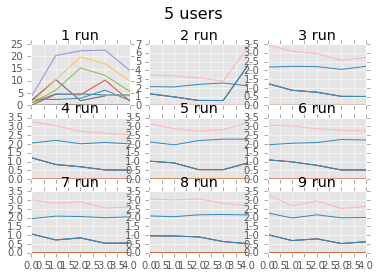

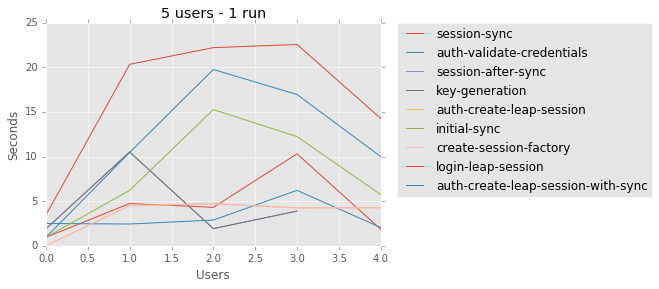

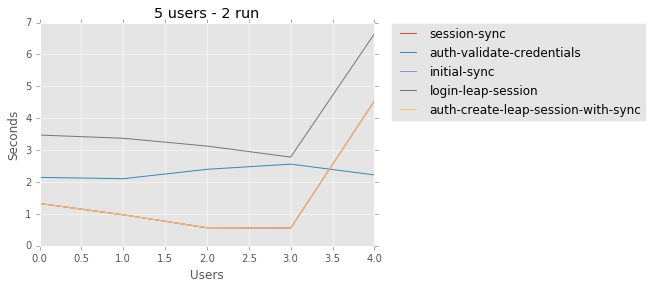

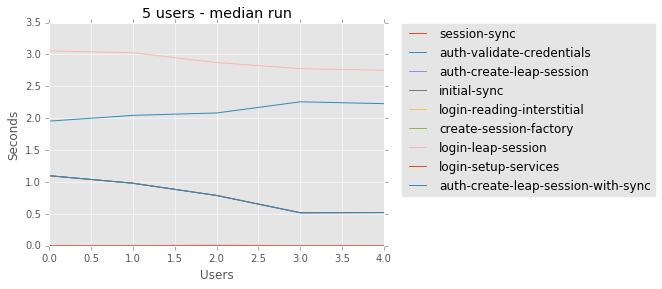

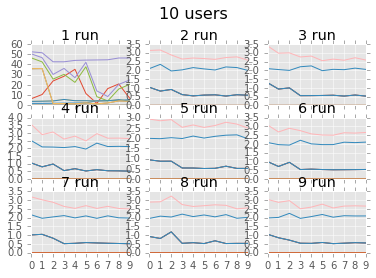

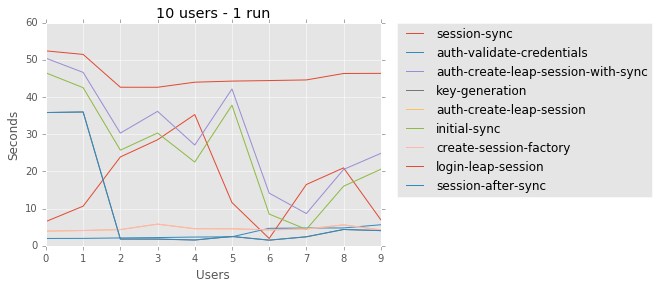

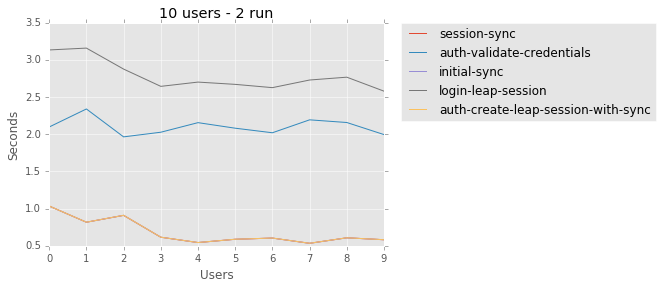

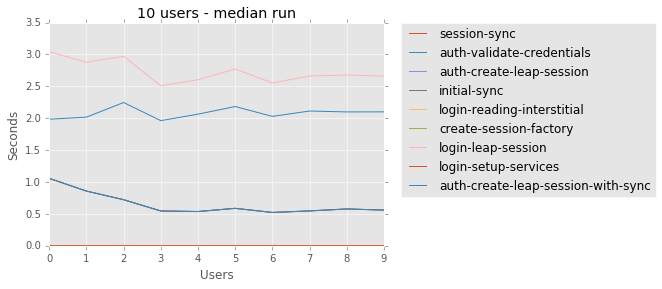

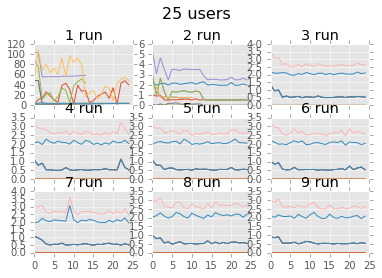

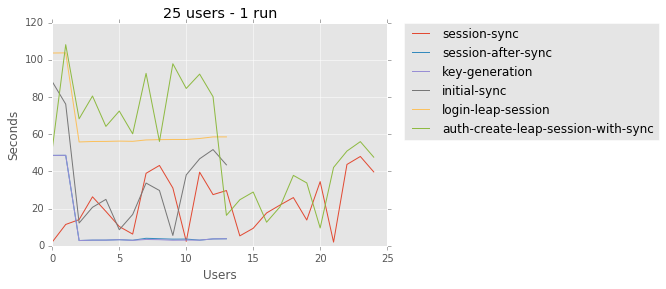

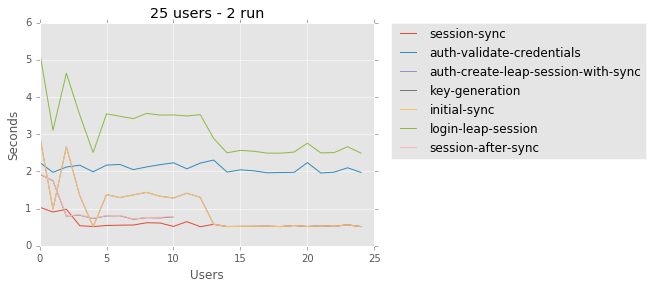

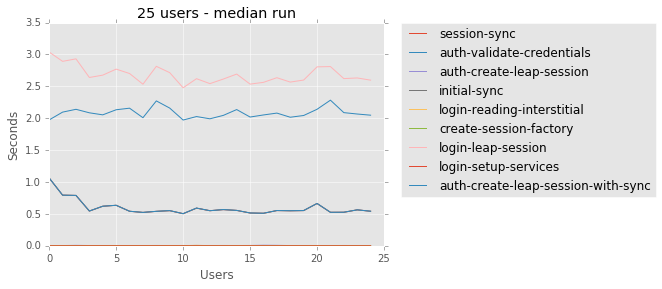

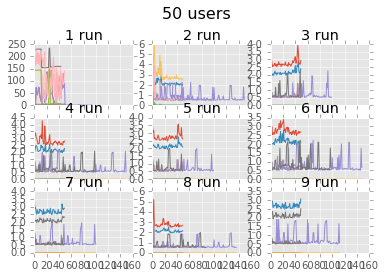

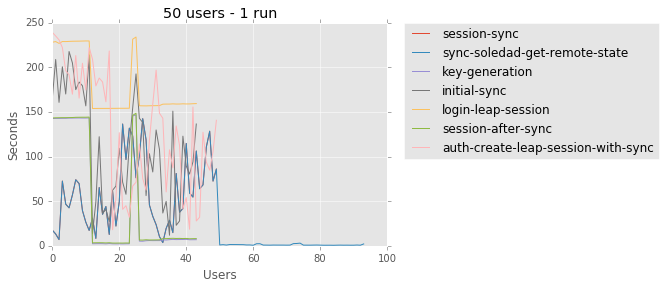

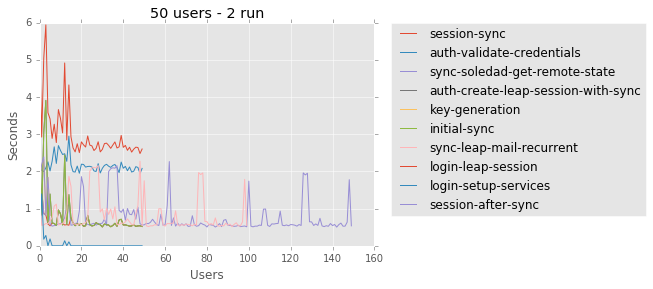

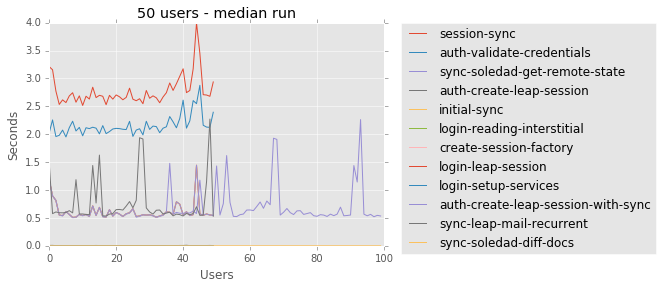

In [4]:
for users in [5, 10, 25, 50]:
    subplot_logins(users)
    plot_logins(get_run(users, 0, 1), users, 1, omit_tiny_metrics=True)
    plot_logins(get_run(users, 0, 2), users, 2, omit_tiny_metrics=True)
    plot_logins(get_median_run(users), users, 'median')